# Example workflow

In this workbook, we demonstrate several different MPT-Calculator workflows. We will cover constructing a new object and assigning material properties, running MPT-Calculator over wide specific frequency sweeps, and checking convergence for the eigenvalues we obtain.

## Generating a geometry:

$\texttt{.geo}$ files follow a standard format and objects are defined via object primatives. See [this tutorial](./4_Defining_a_geo_file.ipynb) for more detail.

For this example, we wish to simulate a simple steel wrench inside a large non-conducting sphere. 
We begin by first defining the desired geometry and saving it as $\texttt{Wrench.geo}$.
<!--
```
algebraic3d

solid sphout = sphere (0, 0, 0; 1000);

solid shaft = orthobrick(-10, -1, -0.5; 10, 1, 0.5) -maxh=0.5;

solid claw = cylinder(11, 0, -0.5; 11, 0, 0.5; 2)
	and plane(0, 0, 0.5; 0, 0, 1)
	and plane(0, -0, -0.5; 0, 0, -1);

solid cutout_claw = orthobrick (10.3, -0.75, -0.51; 13, 0.75, 0.51);

solid socket = cylinder(-11, 0, -1; -11, 0, 1; 2)
	and plane(0, 0, 0.5; 0, 0, 1)
	and plane(0, -0, -0.5; 0, 0, -1);

solid cutout_socket = cylinder(-11.2, 0, -1.1; -11.2, 0, 1.1; 1.3)
	and plane(0, 0, 0.51; 0, 0, 1)
	and plane(0, -0, -0.51; 0, 0, -1);

solid wrench = shaft or claw and not cutout_claw or socket and not cutout_socket;


solid rest = sphout and not wrench;

tlo rest -transparent -col=[0,0,1];#air
tlo wrench -col=[1,0,0];#wrench -mur=1  -sig=3.5E7
```
-->
<b>In this example, the dimensions are in mm, thus we also want to choose $\alpha=1\times 10^{-3}$</b>

This geometry has been saved in [$\texttt{GeoFiles/Wrench.geo}$](../GeoFiles/Wrench.geo). Note that we have also defined a relative permeability $\mu_r = 1$ and conductivity $\sigma_*=3.5 \times 10^7$ S/m inside the wrench to match our desired material output.

We can check the geometry of the object by either loading it into $\texttt{Netgen}$ directly, or via the supported web gui.

## Running a sweep and checking for convergence
For this example, we want to run MPT-Calculator over the frequency range $10^3$ rad/s to $10^6$ rad/s in 80 logarithmically spaced steps.

We need to run the simulation with these settings, and check that the solution we obtain is converged for the entire frequency range of interest. To do this, we will iterate MPT-Calculator for $p=2,3,4$.

In [1]:
start = 3
stop = 6
points = 80
geometry = 'Wrench.geo'

To run the code, we need to navigate to the root directory

In [2]:
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path= r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()

'C:\\Users\\James\\Desktop\\Release_Ready_MPT_Calculator\\Restructured_MPT_Calculator'

We now import the main function, along with numpy and matplotlib for plotting the results

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from main import main

And run the simulation (note the case of higher order elements will take longer to run for this example given the number of elements in the mesh)

Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 21946 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [02:36<00:00, 12.07s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 13
manually closed poolder model
 reduced order systems solved
 frequency sweep complete
Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 21946 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [07:50<00:00, 36.22s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 13
manually closed poolder model
 reduced order systems solved
 frequency sweep complete
Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 21946 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [18:44<00:00, 86.51s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 13
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


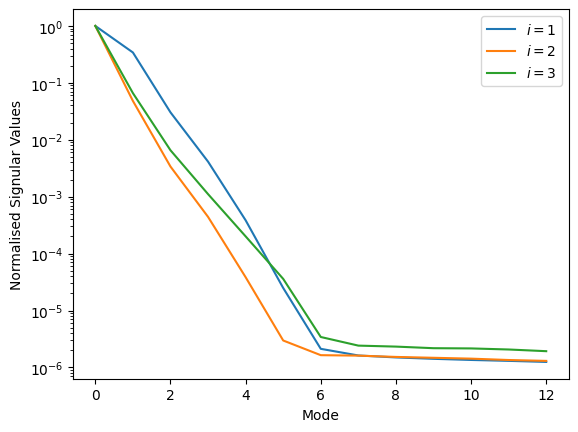

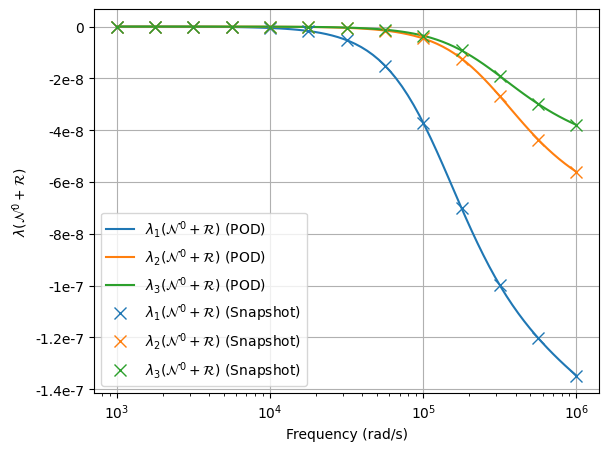

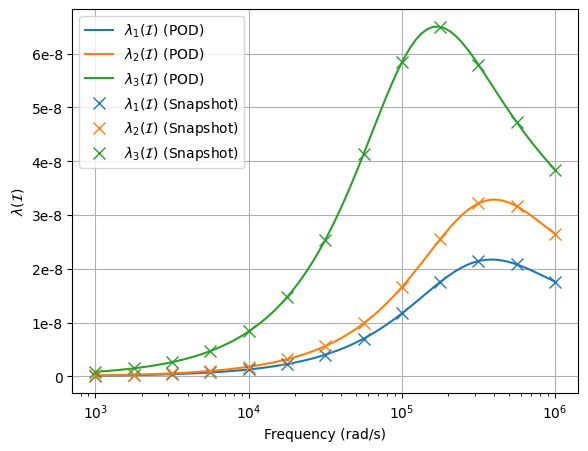

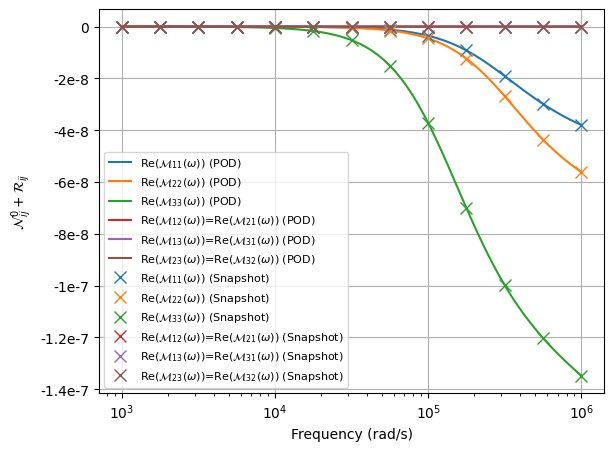

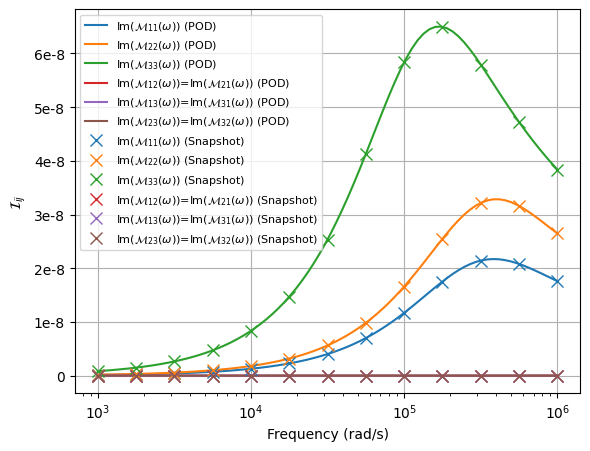

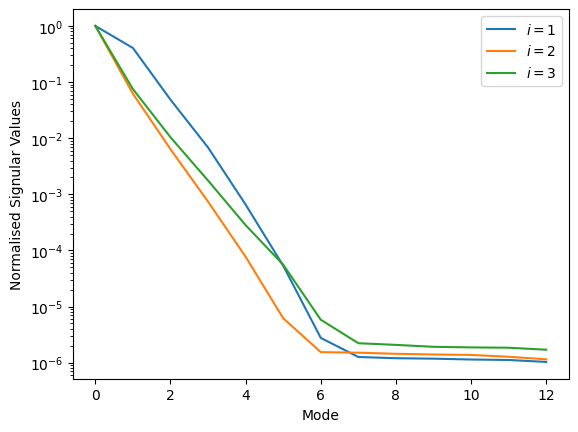

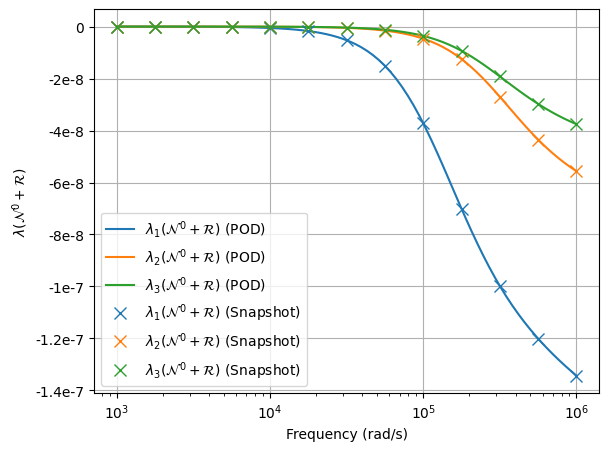

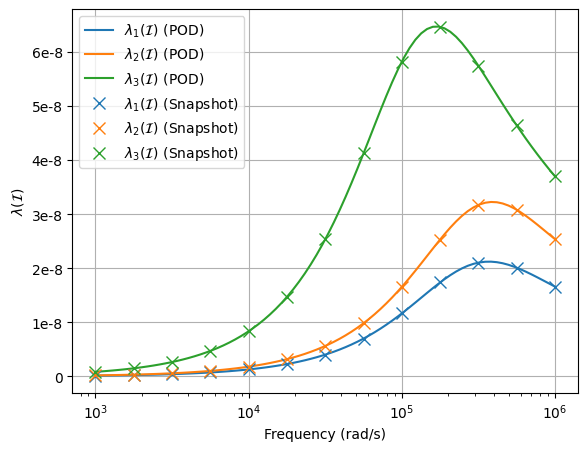

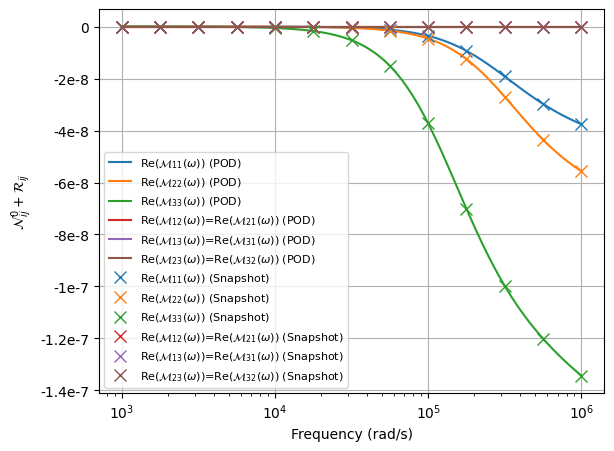

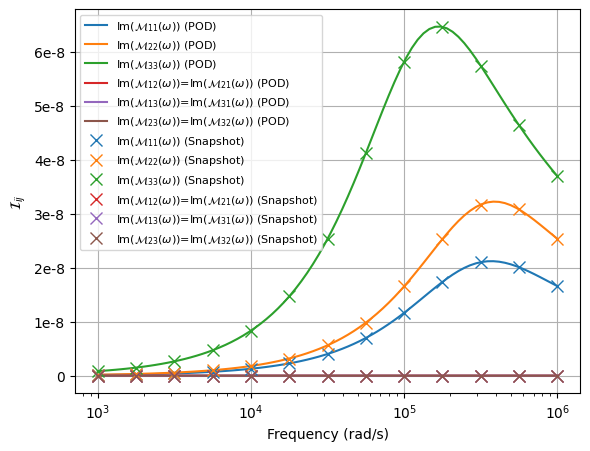

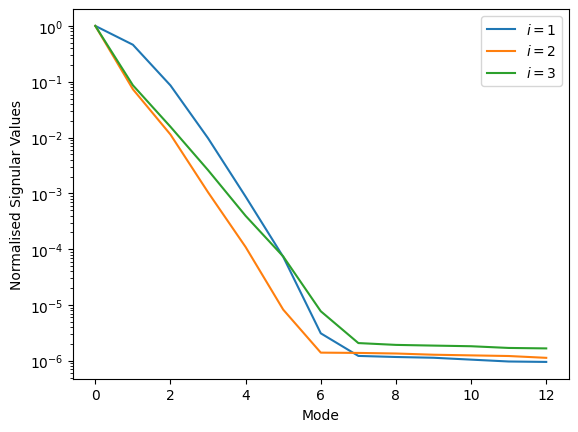

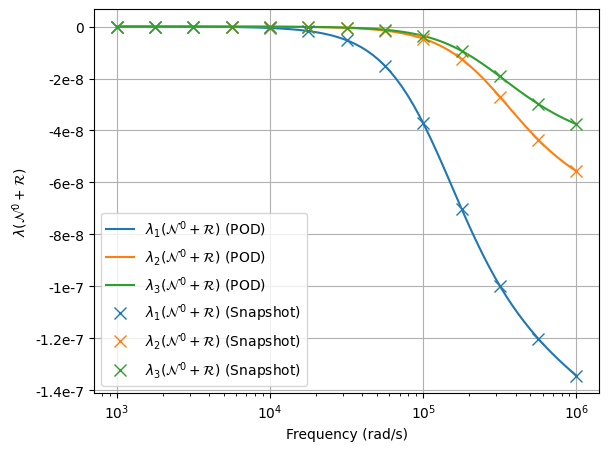

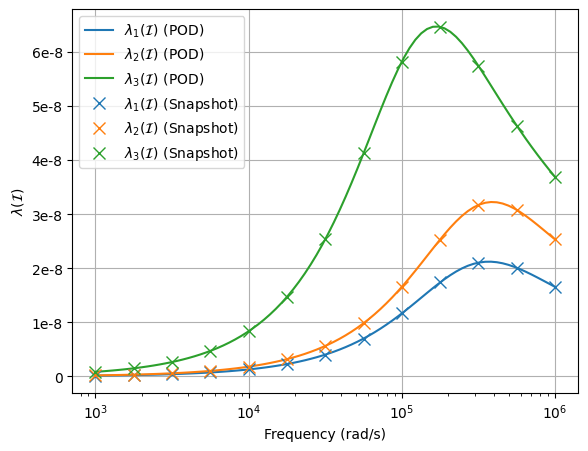

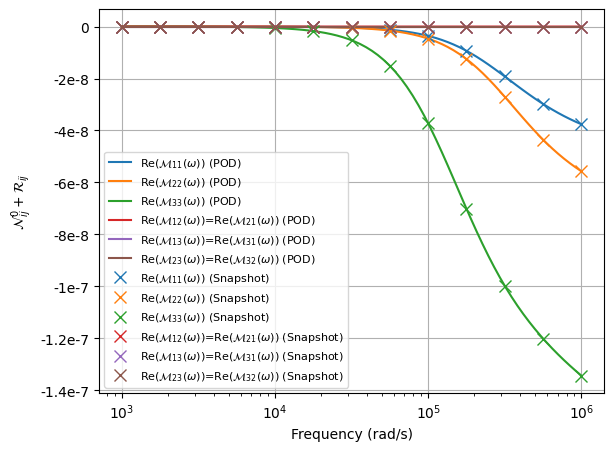

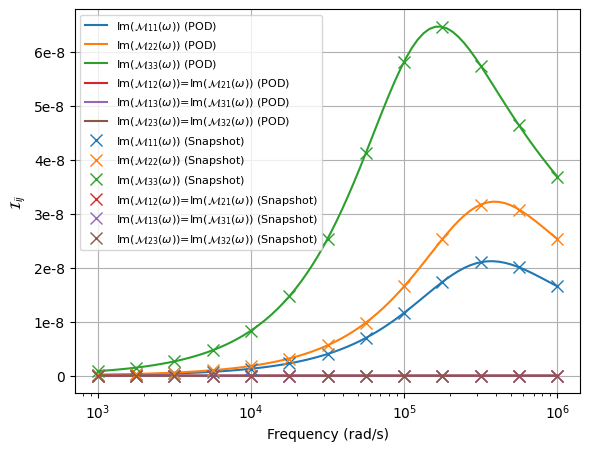

In [4]:
comparison_eigs = np.zeros((80,3,3), dtype=complex)
for p in [2,3,4]:
    ReturnDict = main(start_stop=(start, stop, points), geometry=geometry, order=p, use_POD=True)
    comparison_eigs[:,:,p-2] = ReturnDict['EigenValues']

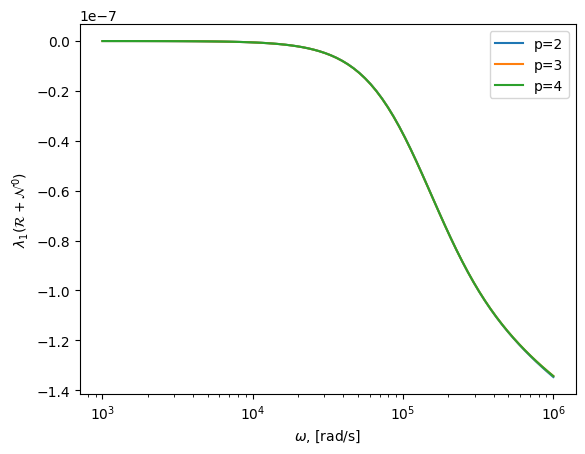

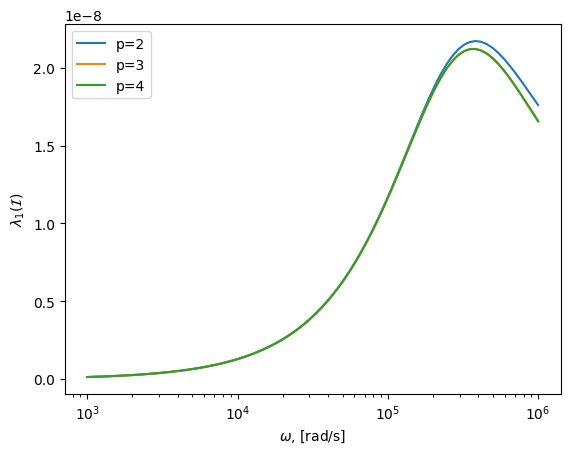

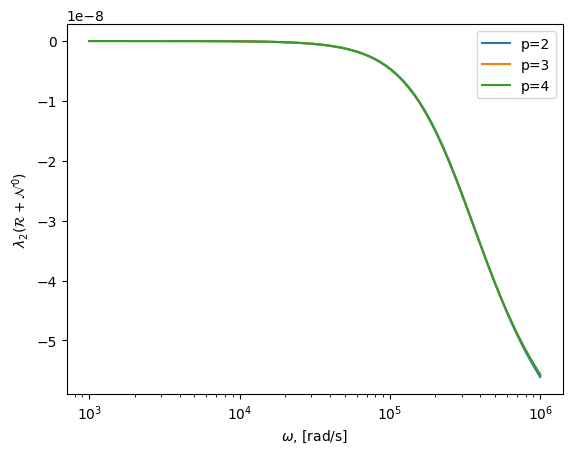

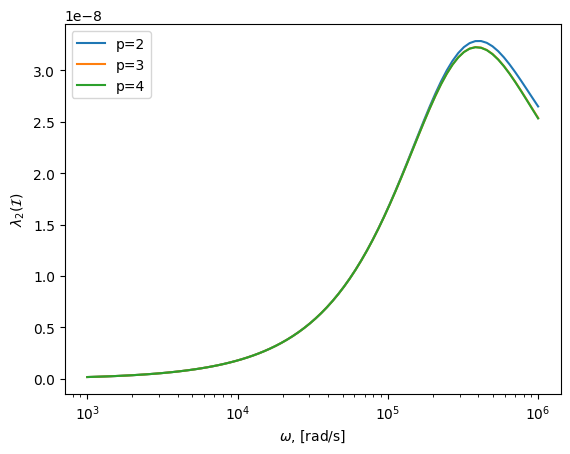

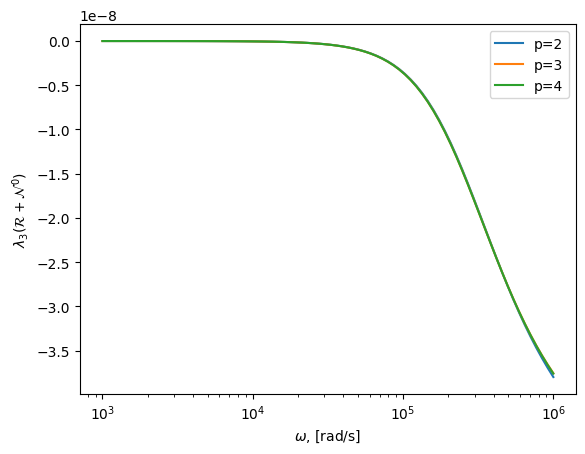

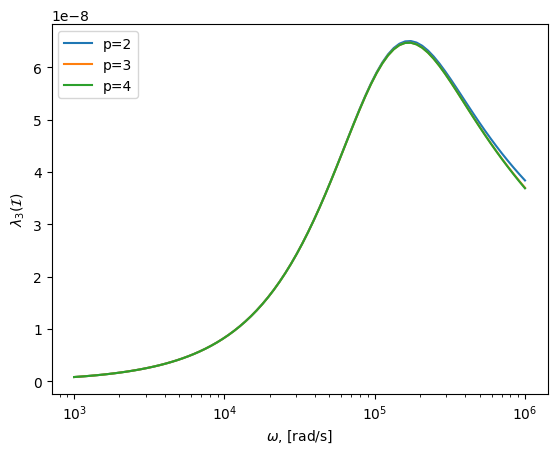

In [5]:
for eignum in [0,1,2]:
    plt.figure()
    for order in [0,1,2]:
        plt.semilogx(ReturnDict['FrequencyArray'], comparison_eigs[:,eignum, order].real, label=f'p={order + 2}')
    plt.legend();
    plt.xlabel('$\omega$, [rad/s]');
    plt.ylabel(f'$\lambda_{eignum+1}'+'(\mathcal{R}+\mathcal{N}^0)$');

    plt.figure()
    for order in [0,1,2]:
        plt.semilogx(ReturnDict['FrequencyArray'], comparison_eigs[:,eignum, order].imag, label=f'p={order + 2}')
    plt.legend();
    plt.xlabel('$\omega$, [rad/s]');
    plt.ylabel(f'$\lambda_{eignum+1}'+'(\mathcal{I})$');


The results show that the solution is converged using order $p=3$ elements for the frequency range specified.

## Running MPT-Calculator using OCC
In this example, we run MPT-Calculator using the OCC geometry defined in $\texttt{OCC_dualbar.py}$. This is an example of an two blocks placed next to each other with different materials, resulting in an inhomogeneous object.

This example recreates the results for an inhomogeneous object presented in [1], and has a large number of elements. Consequently, it will take longer to run.

[1] B. A. Wilson and P. D. Ledger, B. A. Wilson, P. D. Ledger, Efficient computation of the magnetic polarizabiltiy tensor spectral signature using proper orthogonal decomposition, Int. J. Numer. Meth. Eng. 1940-1963, 122(8), 2021

Updated alpha from OCC file. Alpha=0.001
OCC_dualbar.geo
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 78714


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 78714 elements


Solving Theta0: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 2901.96it/s]


 solved theta0 problems    
 solving theta1 snapshots


Solving Theta1 Snapshots: 100%|█████████████████████████████████████████████████████| 13/13 [11:12<00:00, 51.73s/it]


manually closed pool
 SVD complete                
 Number of retained modes = 13
manually closed poolder model
 reduced order systems solved
 frequency sweep complete


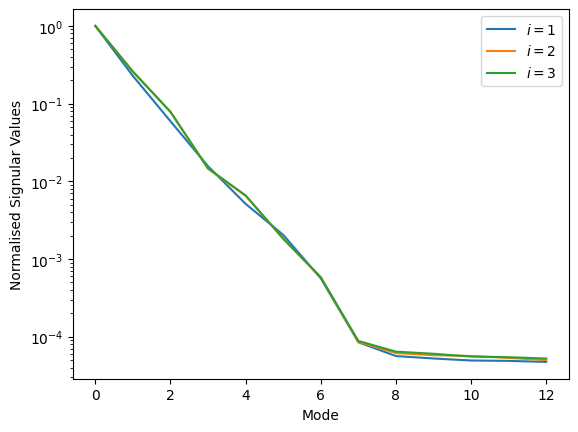

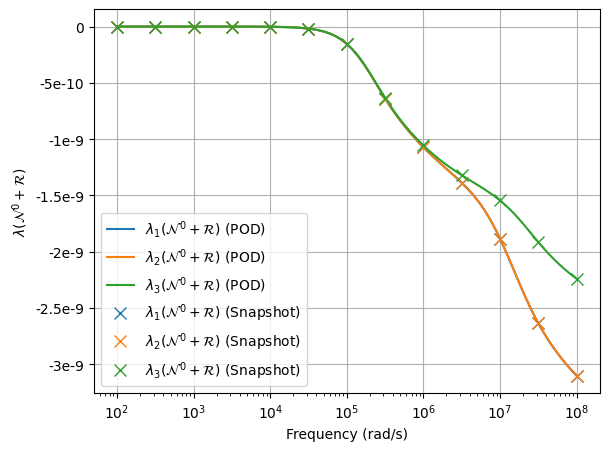

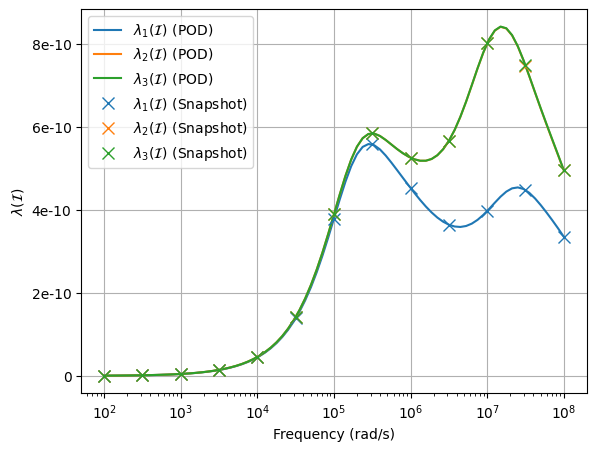

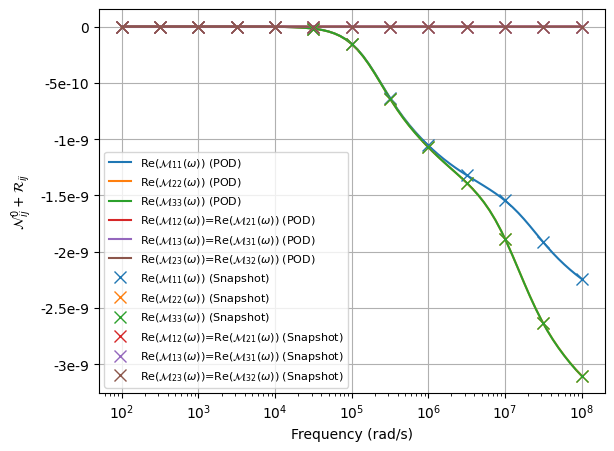

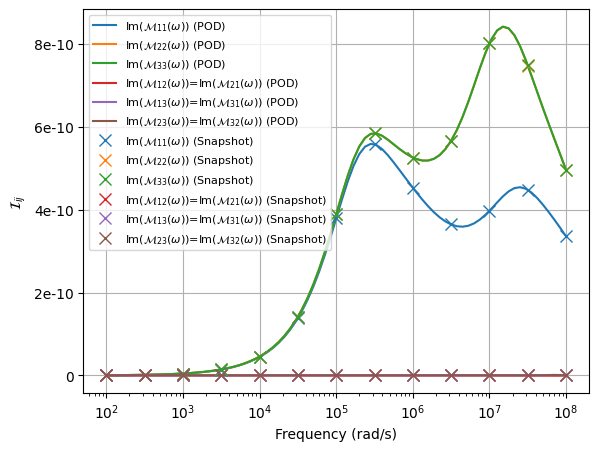

In [6]:
from main import main
ReturnDict = main(geometry='OCC_dualbar.py', use_OCC=True, start_stop=(2,8,81), use_POD=True)

## Running MPT-Calculator using a single core sequentially
In this example, we run MPT-Calculator in a non-parallel computation. This is useful for large problems where RAM usage is a concern. Note that the number of parallel threads can be controlled via the $\texttt{CPUs}$ variable in $\texttt{Settings.py}$.

Updated alpha from OCC file. Alpha=0.001
OCC_dualbar.geo
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 78714


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains 78714 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.93s/it]


 solved theta0 problems   


Solving Theta1: 100%|███████████████████████████████████████████████████████████████| 13/13 [09:32<00:00, 44.03s/it]


 solved theta1 problems     
 SVD complete                
 Number of retained modes = 13


Solving Reduced Order Systems: 100%|████████████████████████████████████████████████| 40/40 [00:17<00:00,  2.23it/s]


 reduced order systems solved        
 frequency sweep complete


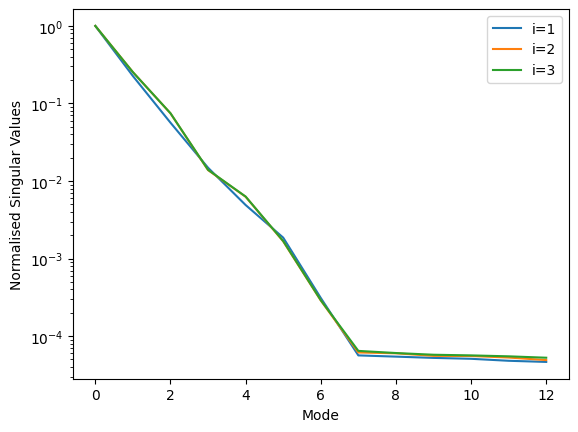

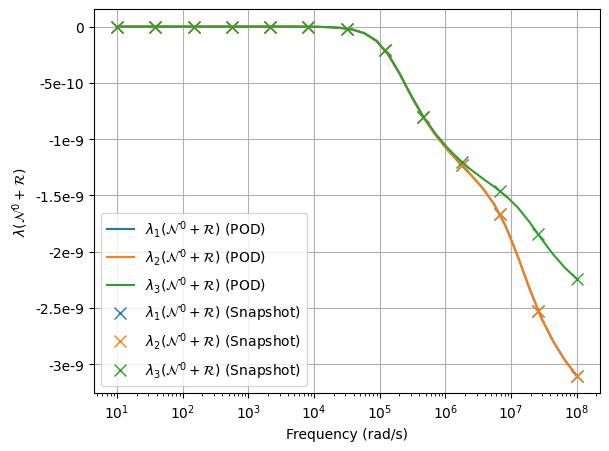

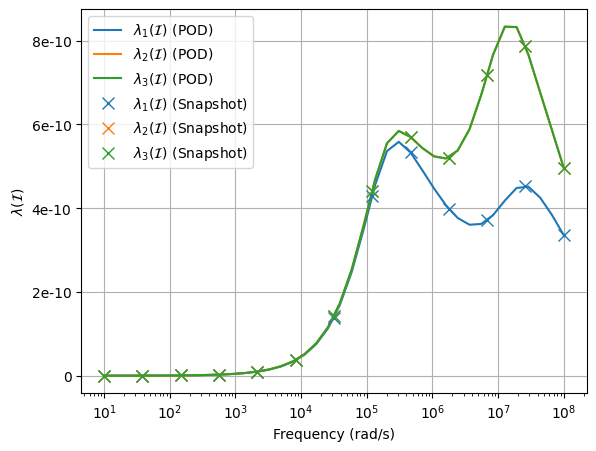

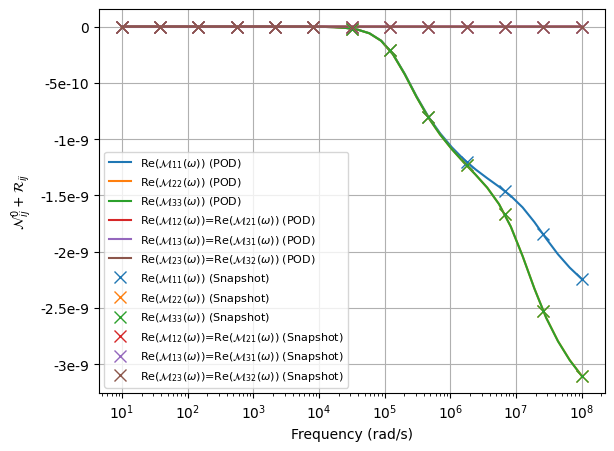

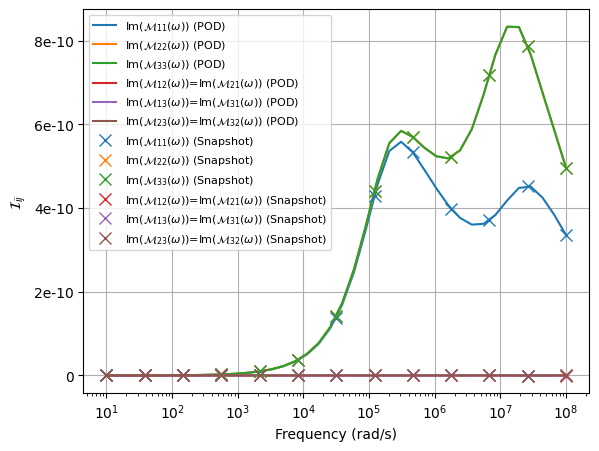

In [7]:
from main import main
ReturnDict = main(geometry='OCC_dualbar.py', use_OCC=True, use_parallel=False, use_POD=True)